## Fit a distribution to the number of COVID-19 new cases of a state of your choosing.

## Getting the data

In [1]:
import pandas as pd

In [2]:
def get_state_data(state,dataset_type):
    population_dataset = pd.read_csv('../../../../data/stage_2/covid_county_population_usafacts.csv')
    population_df = pd.DataFrame(population_dataset)
    if(dataset_type=='cases'):
        dataset = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
    elif(dataset_type=='deaths'):
        dataset = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
    state_wise_data = dataset[dataset['County Name'] != 'Statewide Unallocated']
    state_wise_data = state_wise_data.set_index(['countyFIPS','County Name','State','StateFIPS'])
    everyday_new_cases = state_wise_data.diff(axis=1)
    everyday_new_cases = everyday_new_cases.drop(columns = ['2020-01-22'])
    merged_cases_perday = pd.merge(everyday_new_cases, population_df, on='countyFIPS', how ='inner' )
    merged_cases_perday_state = merged_cases_perday[merged_cases_perday['State'] == state]
    merged_cases_perday_state = merged_cases_perday_state.set_index(['countyFIPS','State','County Name'])
    merged_cases_perday_state = round(((merged_cases_perday_state.div(merged_cases_perday_state['population'], axis=0))*100000).astype(int))
    merged_cases_perday_state = merged_cases_perday_state.drop(columns = ['population'])
    covid_cases_summed = merged_cases_perday_state.sum(axis = 0, skipna = True)
    df = pd.DataFrame(columns=everyday_new_cases.columns)
    df = df.append(covid_cases_summed, ignore_index=True)
    return df

## Fitting a distribution for NY new case
## checking minimum, maximum and mean to see the insights of data

In [3]:
def calculate_stats(dataframe, state):
    print('Statistics of', state, 'state is shown below')
    print('Minimum value --- ',dataframe.min(axis=1)[0])
    print('Maximum value --- ',dataframe.max(axis=1)[0])
    print('Mean --- ',dataframe.mean(axis=1)[0])
    print('Mode --- ',dataframe.mode(axis=1)[0][0])
    print('Variance --- ',dataframe.var(axis=1)[0])
    print('Kurtosis --- ',dataframe.kurt(axis=1)[0])
    print('Skewdness --- ',dataframe.skew(axis=1)[0])

## First plot the histogram to see what distribution fits better
In the below histogram it is evident that data is skewed to the right. Since I am using discrete values for plotting, I will use Poisson distribution to fit to the data

In [4]:
ny_df = get_state_data('NY','cases')
calculate_stats(ny_df, 'Newyork')

Statistics of Newyork state is shown below
Minimum value ---  -219.0
Maximum value ---  6610.0
Mean ---  915.513986013986
Mode ---  0
Variance ---  1407841.8334292676
Kurtosis ---  3.6811391812611043
Skewdness ---  1.9278708316495297


In [5]:
ny_df

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
0,0,0,0,0,0,0,0,0,0,0,...,0,1962,682,870,1025,1147,1246,0,2316,918


<AxesSubplot:>

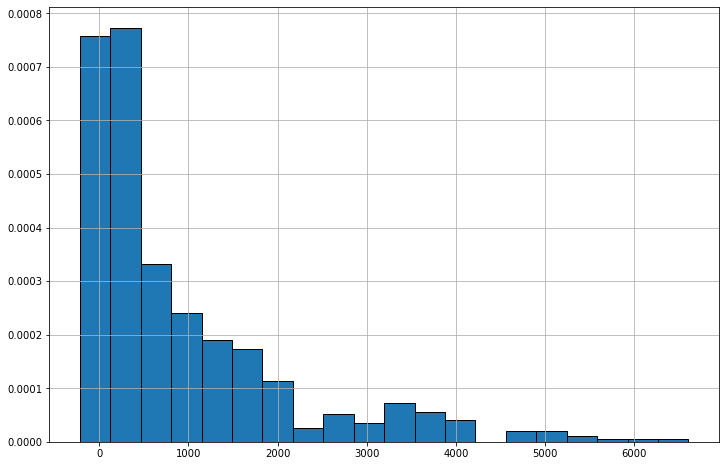

In [6]:
ny_df_stk = ny_df.stack()
ny_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

In [7]:
from scipy.stats.distributions import poisson
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
def get_pmf(dataframe): 
    poiss_val = []
    max_case = dataframe.max()
    mean_case = dataframe.mean()
    min_case = 0
    for values in range(min_case, max_case):
        pmf = poisson.pmf(k=values, mu=mean_case)
        poiss_val.append(pmf)
        
    y_values = np.array(poiss_val)
    x_values = np.arange(min_case, max_case)
    
    return x_values, y_values
    

PMF values         0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
6605  0.0
6606  0.0
6607  0.0
6608  0.0
6609  0.0

[6610 rows x 1 columns]


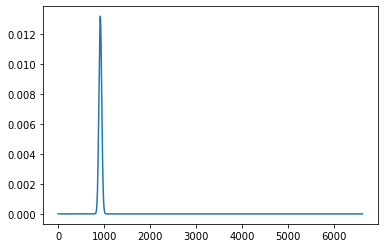

In [9]:
x_ny,y_ny=get_pmf(ny_df_stk)
plt.plot(x_ny,y_ny)
print('PMF values',pd.DataFrame(y_ny))

## Comapring Newyork statistics with five other states 

## California

In [11]:
ca_df = get_state_data('CA','cases')
calculate_stats(ca_df, 'California')

Statistics of California state is shown below
Minimum value ---  -2665.0
Maximum value ---  15142.0
Mean ---  853.3111888111888
Mode ---  0
Variance ---  2005056.4879306331
Kurtosis ---  21.131833195870506
Skewdness ---  3.491664580546725


<AxesSubplot:>

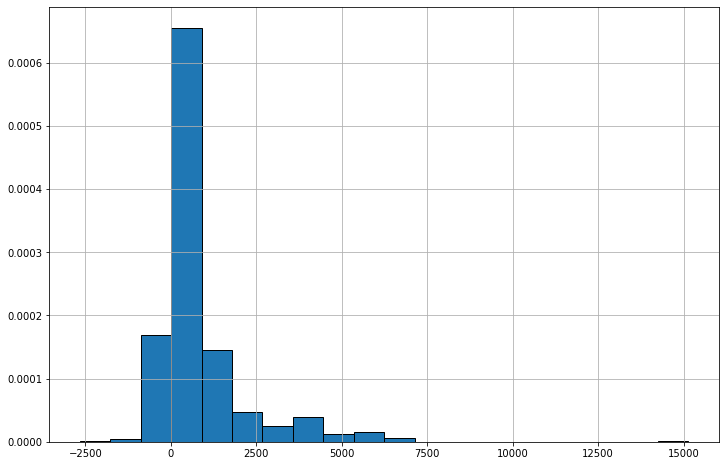

In [12]:
ca_df_stk = ca_df.stack()
ca_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values          0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
15137  0.0
15138  0.0
15139  0.0
15140  0.0
15141  0.0

[15142 rows x 1 columns]


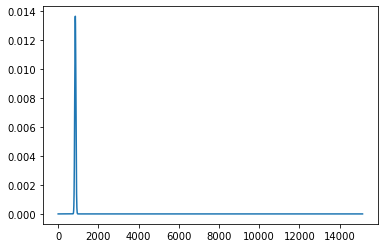

In [13]:
x_ca,y_ca=get_pmf(ca_df_stk)
plt.plot(x_ca,y_ca)
print('PMF values',pd.DataFrame(y_ca))

## Florida

In [14]:
fl_df = get_state_data('FL','cases')
calculate_stats(fl_df, 'Florida')

Statistics of Florida state is shown below
Minimum value ---  -7440.0
Maximum value ---  50009.0
Mean ---  1486.0104895104896
Mode ---  0
Variance ---  13454329.369416924
Kurtosis ---  108.77769430544049
Skewdness ---  9.574817227522471


<AxesSubplot:>

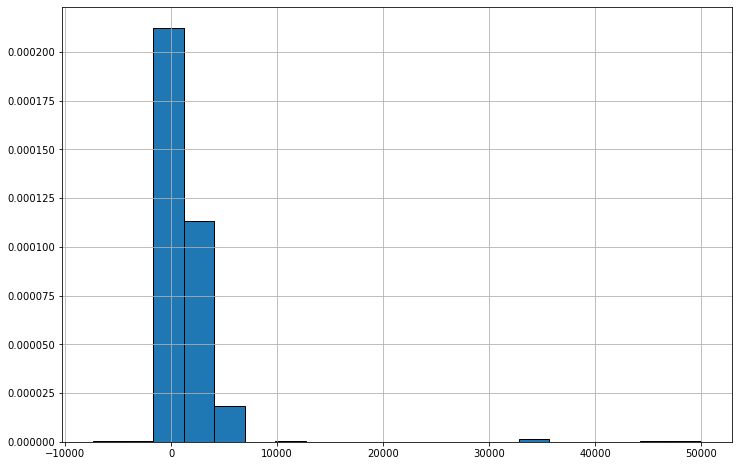

In [15]:
fl_df_stk = fl_df.stack()
fl_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values          0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
50004  0.0
50005  0.0
50006  0.0
50007  0.0
50008  0.0

[50009 rows x 1 columns]


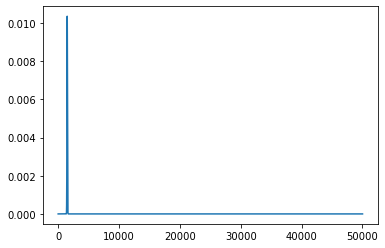

In [16]:
x_fl,y_fl=get_pmf(fl_df_stk)
plt.plot(x_fl,y_fl)
print('PMF values',pd.DataFrame(y_fl))

## South Carolina

In [17]:
sc_df = get_state_data('SC','cases')
calculate_stats(sc_df, 'South Carolina')

Statistics of South Carolina state is shown below
Minimum value ---  -2354.0
Maximum value ---  9180.0
Mean ---  997.4055944055945
Mode ---  0
Variance ---  1584449.5935238143
Kurtosis ---  7.128442374549989
Skewdness ---  2.263158160016531


<AxesSubplot:>

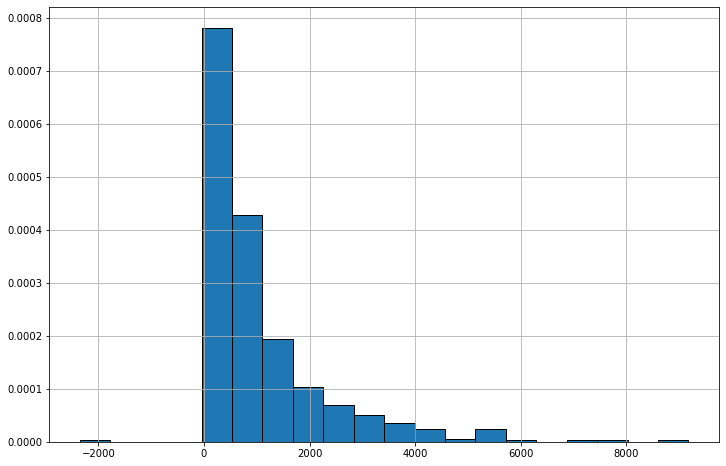

In [18]:
sc_df_stk = sc_df.stack()
sc_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values         0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
9175  0.0
9176  0.0
9177  0.0
9178  0.0
9179  0.0

[9180 rows x 1 columns]


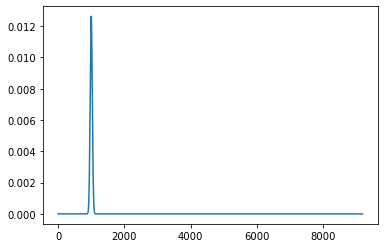

In [19]:
x_sc,y_sc=get_pmf(sc_df_stk)
plt.plot(x_sc,y_sc)
print('PMF values',pd.DataFrame(y_sc))

## Texas

In [20]:
tx_df = get_state_data('TX','cases')
calculate_stats(tx_df, 'Texas')

Statistics of Texas state is shown below
Minimum value ---  -669959.0
Maximum value ---  673907.0
Mean ---  5153.388111888112
Mode ---  0
Variance ---  1811466047.7090003
Kurtosis ---  223.03294084578965
Skewdness ---  0.6085739073539245


<AxesSubplot:>

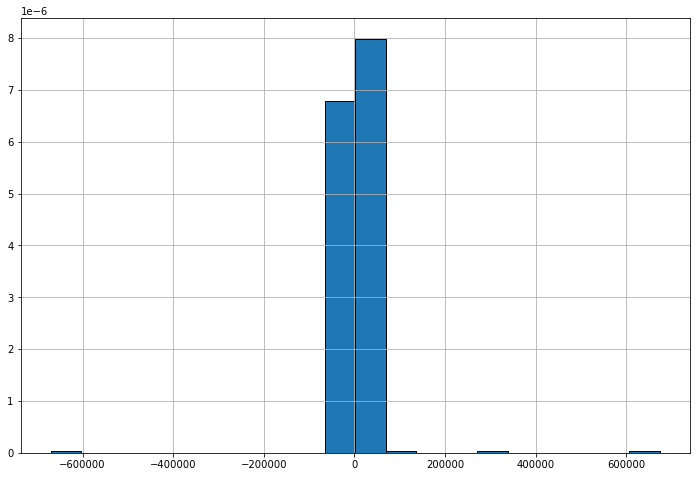

In [21]:
tx_df_stk = tx_df.stack()
tx_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values           0
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
...     ...
673902  0.0
673903  0.0
673904  0.0
673905  0.0
673906  0.0

[673907 rows x 1 columns]


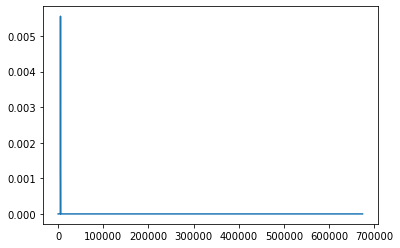

In [22]:
x_tx,y_tx=get_pmf(tx_df_stk)
plt.plot(x_tx,y_tx)
print('PMF values',pd.DataFrame(y_tx))

## Arizona

In [23]:
ar_df = get_state_data('AR','cases')
calculate_stats(ar_df, 'Arizona')

Statistics of Arizona state is shown below
Minimum value ---  0.0
Maximum value ---  15124.0
Mean ---  1794.1241258741259
Mode ---  0
Variance ---  4978716.175458955
Kurtosis ---  3.8290526961352103
Skewdness ---  1.8493485393173823


<AxesSubplot:>

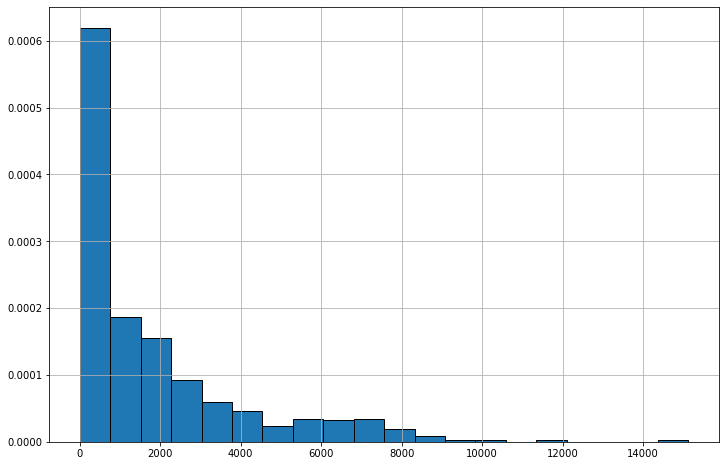

In [25]:
ar_df_stk = ar_df.stack()
ar_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values          0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
15119  0.0
15120  0.0
15121  0.0
15122  0.0
15123  0.0

[15124 rows x 1 columns]


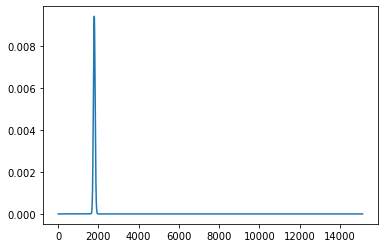

In [26]:
x_ar,y_ar=get_pmf(ar_df_stk)
plt.plot(x_ar,y_ar)
print('PMF values',pd.DataFrame(y_ar))

## Death Case Analysis

## Inital state chosen is Newyork

In [28]:
ny_death_df = get_state_data('NY','deaths')
calculate_stats(ny_death_df, 'Newyork')

Statistics of Newyork state is shown below
Minimum value ---  -205.0
Maximum value ---  257.0
Mean ---  11.662587412587413
Mode ---  0
Variance ---  719.2397186876171
Kurtosis ---  36.2634174939987
Skewdness ---  3.3319082372957656


<AxesSubplot:>

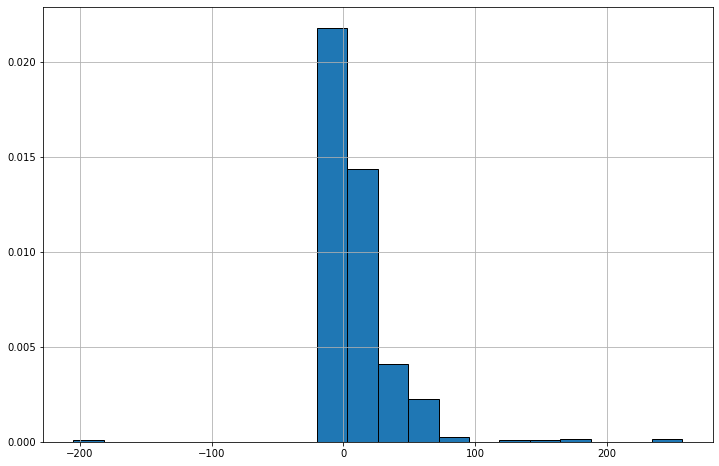

In [29]:
ny_death_df_stk = ny_death_df.stack()
ny_death_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values                  0
0     8.609990e-06
1     1.004148e-04
2     5.855480e-04
3     2.276335e-03
4     6.636988e-03
..             ...
252  2.861935e-234
253  1.319271e-235
254  6.057527e-237
255  2.770449e-238
256  1.262133e-239

[257 rows x 1 columns]


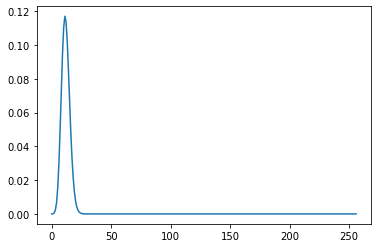

In [30]:
x_ny_death,y_ny_death=get_pmf(ny_death_df_stk)
plt.plot(x_ny_death,y_ny_death)
print('PMF values',pd.DataFrame(y_ny_death))

## Comparing Newyork with 5 other states

## California

In [32]:
ca_death_df = get_state_data('CA','deaths')
calculate_stats(ca_death_df, 'California')

Statistics of California state is shown below
Minimum value ---  -250.0
Maximum value ---  82.0
Mean ---  6.449300699300699
Mode ---  0
Variance ---  294.7032044137998
Kurtosis ---  90.21809324034417
Skewdness ---  -4.9844541304614935


<AxesSubplot:>

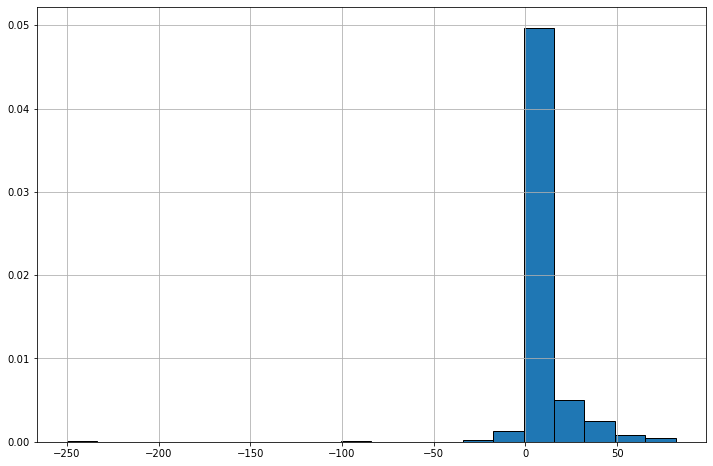

In [33]:
ca_death_df_stk = ca_death_df.stack()
ca_death_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values                0
0   1.581628e-03
1   1.020039e-02
2   3.289270e-02
3   7.071164e-02
4   1.140102e-01
..           ...
77  2.342397e-54
78  1.936772e-55
79  1.581117e-56
80  1.274637e-57
81  1.014879e-58

[82 rows x 1 columns]


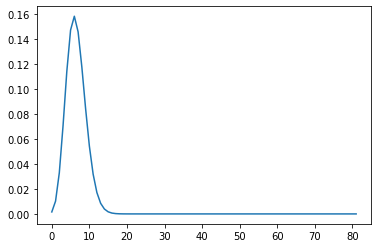

In [34]:
x_ca_death,y_ca_death=get_pmf(ca_death_df_stk)
plt.plot(x_ca_death,y_ca_death)
print('PMF values',pd.DataFrame(y_ca_death))

## Florida

In [35]:
fl_death_df = get_state_data('FL','deaths')
calculate_stats(fl_death_df, 'Florida')

Statistics of Florida state is shown below
Minimum value ---  -29.0
Maximum value ---  121.0
Mean ---  16.124125874125873
Mode ---  0
Variance ---  446.67983723806844
Kurtosis ---  2.8725917743001337
Skewdness ---  1.6246889207670872


<AxesSubplot:>

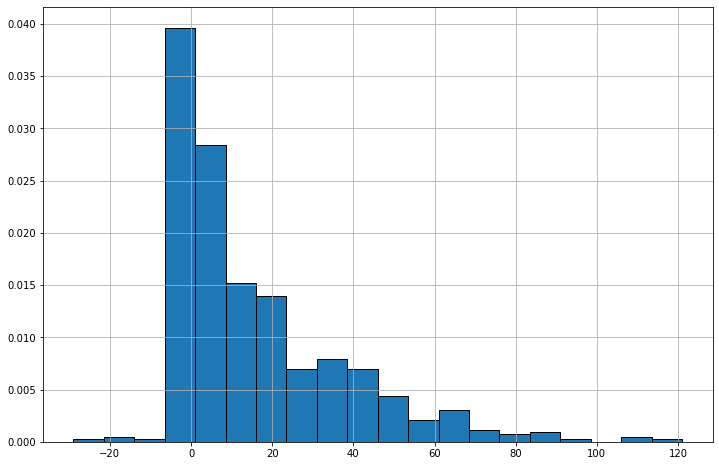

In [36]:
fl_death_df_stk = fl_death_df.stack()
fl_death_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values                 0
0    9.939879e-08
1    1.602719e-06
2    1.292122e-05
3    6.944778e-05
4    2.799462e-04
..            ...
116  3.419953e-58
117  4.713142e-59
118  6.440279e-60
119  8.726376e-61
120  1.172543e-61

[121 rows x 1 columns]


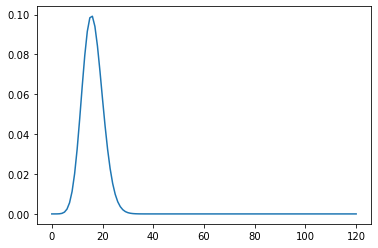

In [37]:
x_fl_death,y_fl_death=get_pmf(fl_death_df_stk)
plt.plot(x_fl_death,y_fl_death)
print('PMF values',pd.DataFrame(y_fl_death))

## South California

In [38]:
sc_death_df = get_state_data('SC','deaths')
calculate_stats(sc_death_df, 'South Carolina')

Statistics of South Carolina state is shown below
Minimum value ---  -13.0
Maximum value ---  247.0
Mean ---  15.013986013986013
Mode ---  0
Variance ---  594.3500667458635
Kurtosis ---  34.24211971309584
Skewdness ---  4.667633249626412


<AxesSubplot:>

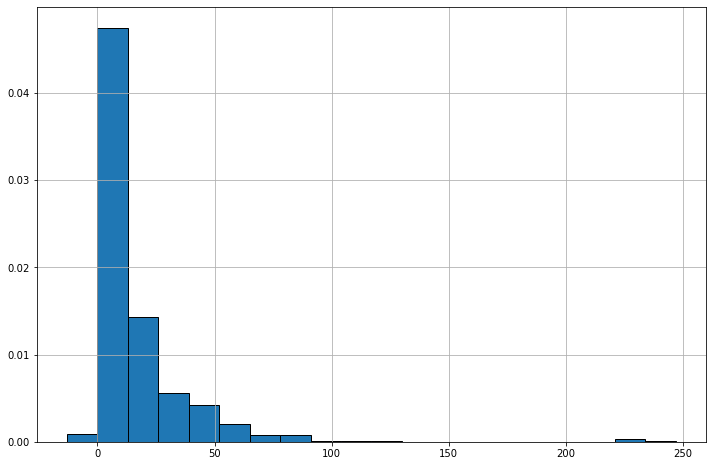

In [39]:
sc_death_df_stk = sc_death_df.stack()
sc_death_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values                  0
0     3.016537e-07
1     4.529025e-06
2     3.399936e-05
3     1.701553e-04
4     6.386773e-04
..             ...
242  6.551508e-196
243  4.047912e-197
244  2.490791e-198
245  1.526396e-199
246  9.315969e-201

[247 rows x 1 columns]


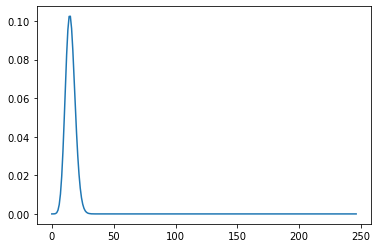

In [40]:
x_sc_death,y_sc_death=get_pmf(sc_death_df_stk)
plt.plot(x_sc_death,y_sc_death)
print('PMF values',pd.DataFrame(y_sc_death))

## Texas

In [41]:
tx_death_df = get_state_data('TX','deaths')
calculate_stats(tx_death_df, 'Texas')

Statistics of Texas state is shown below
Minimum value ---  -41.0
Maximum value ---  2296.0
Mean ---  110.61363636363636
Mode ---  0
Variance ---  35248.63680146474
Kurtosis ---  35.80785276705338
Skewdness ---  4.41554329110284


<AxesSubplot:>

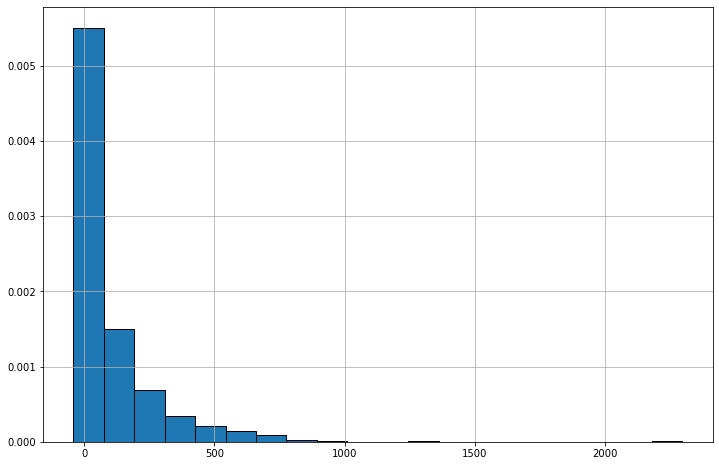

In [42]:
tx_death_df_stk = tx_death_df.stack()
tx_death_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values                  0
0     9.143408e-49
1     1.011386e-46
2     5.593652e-45
3     2.062447e-43
4     5.703370e-42
...            ...
2291  0.000000e+00
2292  0.000000e+00
2293  0.000000e+00
2294  0.000000e+00
2295  0.000000e+00

[2296 rows x 1 columns]


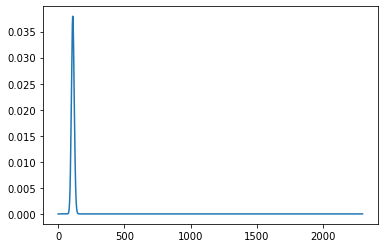

In [43]:
x_tx_death,y_tx_death=get_pmf(tx_death_df_stk)
plt.plot(x_tx_death,y_tx_death)
print('PMF values',pd.DataFrame(y_tx_death))

## Arizona

In [44]:
ar_death_df = get_state_data('AR','deaths')
calculate_stats(ar_death_df, 'Arizona')

Statistics of Arizona state is shown below
Minimum value ---  -167.0
Maximum value ---  343.0
Mean ---  29.28846153846154
Mode ---  0
Variance ---  1830.6434393102518
Kurtosis ---  7.917277312038623
Skewdness ---  2.0707088056304004


<AxesSubplot:>

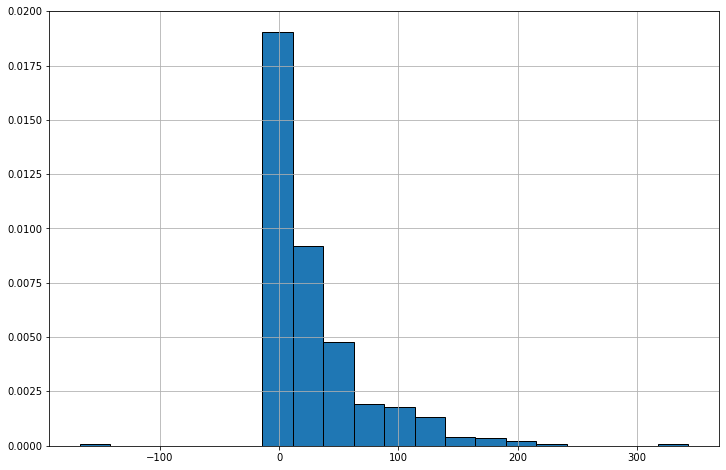

In [45]:
ar_death_df_stk = ar_death_df.stack()
ar_death_df_stk.hist(density=True, bins=20, figsize=(12,8),ec="black")

PMF values                  0
0     1.906263e-13
1     5.583150e-12
2     8.176094e-11
3     7.982174e-10
4     5.844640e-09
..             ...
338  2.385914e-227
339  2.061350e-228
340  1.775699e-229
341  1.525146e-230
342  1.306117e-231

[343 rows x 1 columns]


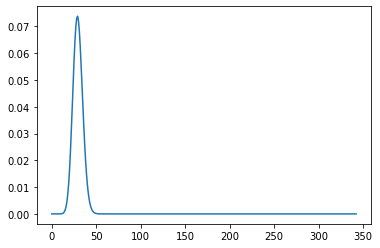

In [46]:
x_ar_death,y_ar_death=get_pmf(ar_death_df_stk)
plt.plot(x_ar_death,y_ar_death)
print('PMF values',pd.DataFrame(y_ar_death))

## The Kurtosis and skewness values are positive and also by looking at the histogram the data is skewed from left to right. This is because There was sudden surge in the covid cases and and it reduced gradually reached minimum, the curve was was flat after people started getting vaccination. 

## Model a poission distribution of COVID-19 cases of a state and compare to other 5 states.

In [47]:

def plot_poisson(dataframe):
    poiss_values = []
    min_case = 0
    max_case = dataframe.max(axis=1)[0].astype(int)
    mean_case = dataframe.mean(axis=1)[0].astype(int)
    poisson_newcases = pd.DataFrame(columns = ['values', 'mean', 'prob_mass_function'])
    ny_cases_poisson = poisson.rvs(size=100000,mu=dataframe.stack().mean())
    for values in range(min_case,max_case):
        poisson_newcases = poisson_newcases.append({'values': values, 'mean': mean_case, 'prob_mass_function': poisson.pmf(k=values,mu=mean_case)}, ignore_index=True)
    pd.DataFrame(ny_cases_poisson).hist(density=True,range=(-0.5,max(ny_cases_poisson)+0.5), bins=max(ny_cases_poisson)+1, figsize=(12,8), ec='blue')    
    x = poisson_newcases['values']
    y = poisson_newcases['prob_mass_function']
    plt.plot(x,y)  
    plt.show()    
    print(poisson_newcases)

## Model a poison distribution for Newyork state Daily new cases

In [48]:
ny_df

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
0,0,0,0,0,0,0,0,0,0,0,...,0,1962,682,870,1025,1147,1246,0,2316,918


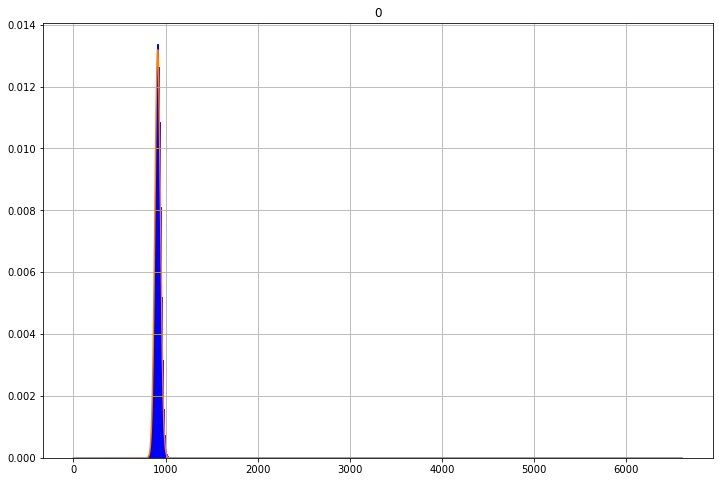

      values   mean  prob_mass_function
0        0.0  915.0                 0.0
1        1.0  915.0                 0.0
2        2.0  915.0                 0.0
3        3.0  915.0                 0.0
4        4.0  915.0                 0.0
...      ...    ...                 ...
6605  6605.0  915.0                 0.0
6606  6606.0  915.0                 0.0
6607  6607.0  915.0                 0.0
6608  6608.0  915.0                 0.0
6609  6609.0  915.0                 0.0

[6610 rows x 3 columns]


In [49]:
plot_poisson(ny_df)

## Compare Newyork state with 5 other states

#### Model a Poisson distribution for California

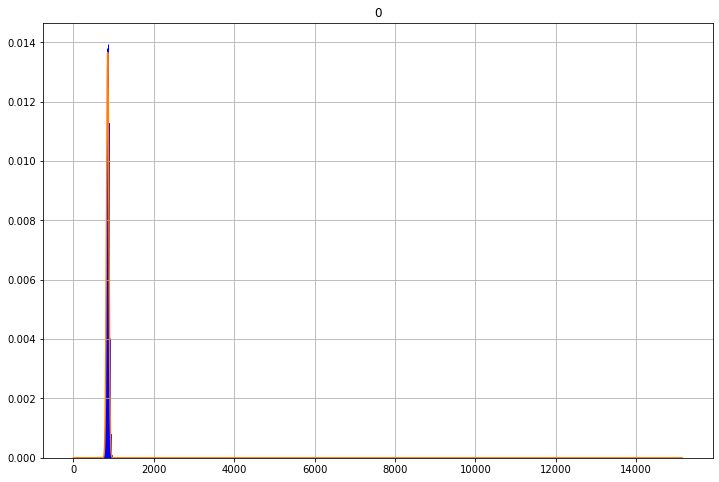

        values   mean  prob_mass_function
0          0.0  853.0                 0.0
1          1.0  853.0                 0.0
2          2.0  853.0                 0.0
3          3.0  853.0                 0.0
4          4.0  853.0                 0.0
...        ...    ...                 ...
15137  15137.0  853.0                 0.0
15138  15138.0  853.0                 0.0
15139  15139.0  853.0                 0.0
15140  15140.0  853.0                 0.0
15141  15141.0  853.0                 0.0

[15142 rows x 3 columns]


In [50]:
plot_poisson(ca_df)

#### Model a Poisson distribution for Florida

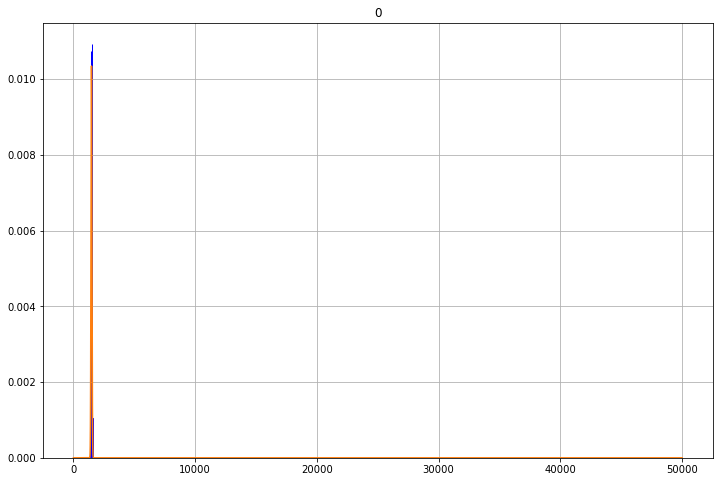

        values    mean  prob_mass_function
0          0.0  1486.0                 0.0
1          1.0  1486.0                 0.0
2          2.0  1486.0                 0.0
3          3.0  1486.0                 0.0
4          4.0  1486.0                 0.0
...        ...     ...                 ...
50004  50004.0  1486.0                 0.0
50005  50005.0  1486.0                 0.0
50006  50006.0  1486.0                 0.0
50007  50007.0  1486.0                 0.0
50008  50008.0  1486.0                 0.0

[50009 rows x 3 columns]


In [51]:
plot_poisson(fl_df)

#### Model a Poisson distribution for South Carolina

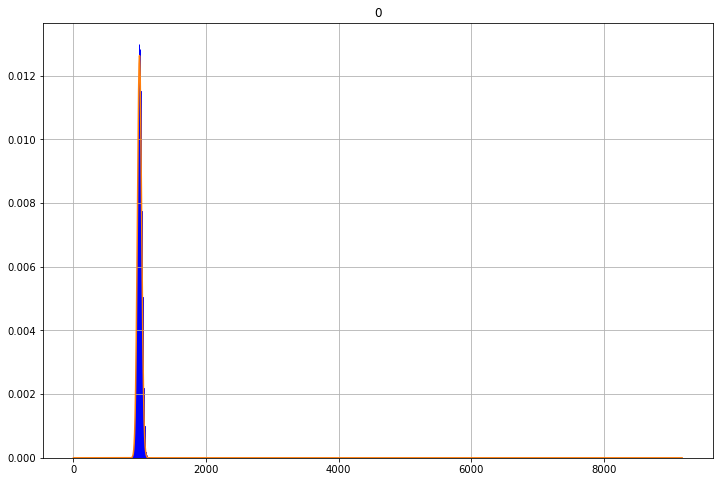

      values   mean  prob_mass_function
0        0.0  997.0                 0.0
1        1.0  997.0                 0.0
2        2.0  997.0                 0.0
3        3.0  997.0                 0.0
4        4.0  997.0                 0.0
...      ...    ...                 ...
9175  9175.0  997.0                 0.0
9176  9176.0  997.0                 0.0
9177  9177.0  997.0                 0.0
9178  9178.0  997.0                 0.0
9179  9179.0  997.0                 0.0

[9180 rows x 3 columns]


In [52]:
plot_poisson(sc_df)

#### Model a Poisson distribution for Texas

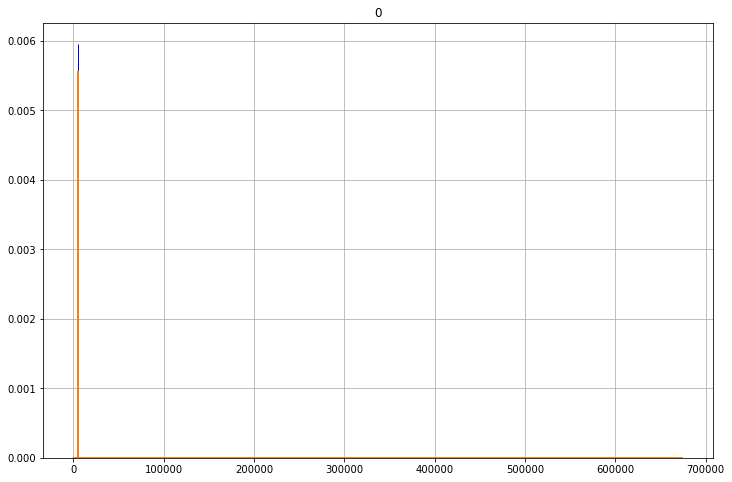

          values    mean  prob_mass_function
0            0.0  5153.0                 0.0
1            1.0  5153.0                 0.0
2            2.0  5153.0                 0.0
3            3.0  5153.0                 0.0
4            4.0  5153.0                 0.0
...          ...     ...                 ...
673902  673902.0  5153.0                 0.0
673903  673903.0  5153.0                 0.0
673904  673904.0  5153.0                 0.0
673905  673905.0  5153.0                 0.0
673906  673906.0  5153.0                 0.0

[673907 rows x 3 columns]


In [53]:
plot_poisson(tx_df)

#### Model a Poisson distribution for Arizona

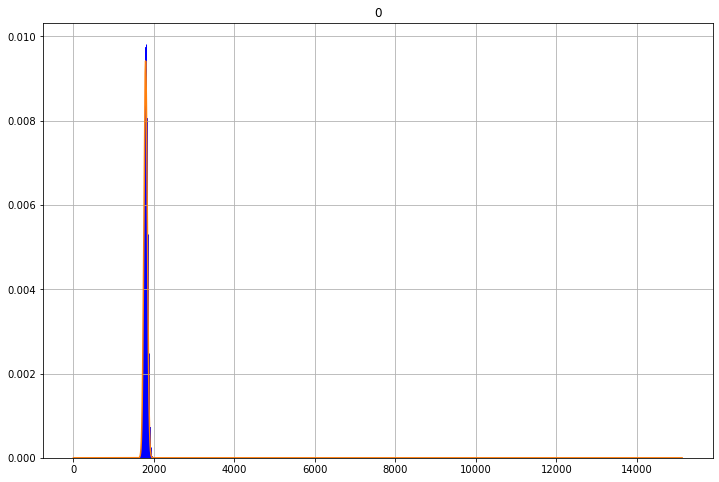

        values    mean  prob_mass_function
0          0.0  1794.0                 0.0
1          1.0  1794.0                 0.0
2          2.0  1794.0                 0.0
3          3.0  1794.0                 0.0
4          4.0  1794.0                 0.0
...        ...     ...                 ...
15119  15119.0  1794.0                 0.0
15120  15120.0  1794.0                 0.0
15121  15121.0  1794.0                 0.0
15122  15122.0  1794.0                 0.0
15123  15123.0  1794.0                 0.0

[15124 rows x 3 columns]


In [54]:
plot_poisson(ar_df)

## Model a poission distribution of COVID-19 death cases of a state and compare to other 5 states.

## Chosing initial state as Newyork

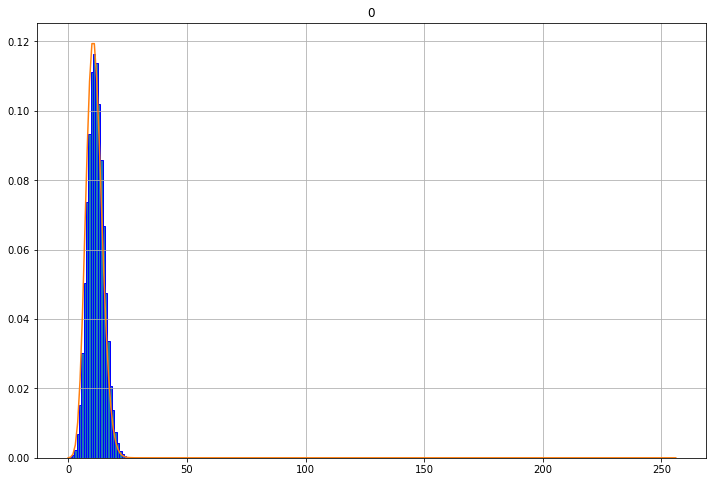

     values  mean  prob_mass_function
0       0.0  11.0        1.670170e-05
1       1.0  11.0        1.837187e-04
2       2.0  11.0        1.010453e-03
3       3.0  11.0        3.704994e-03
4       4.0  11.0        1.018873e-02
..      ...   ...                 ...
252   252.0  11.0       2.203214e-240
253   253.0  11.0       9.579192e-242
254   254.0  11.0       4.148469e-243
255   255.0  11.0       1.789536e-244
256   256.0  11.0       7.689411e-246

[257 rows x 3 columns]


In [55]:
plot_poisson(ny_death_df)

## Comparing with 5 other states death data

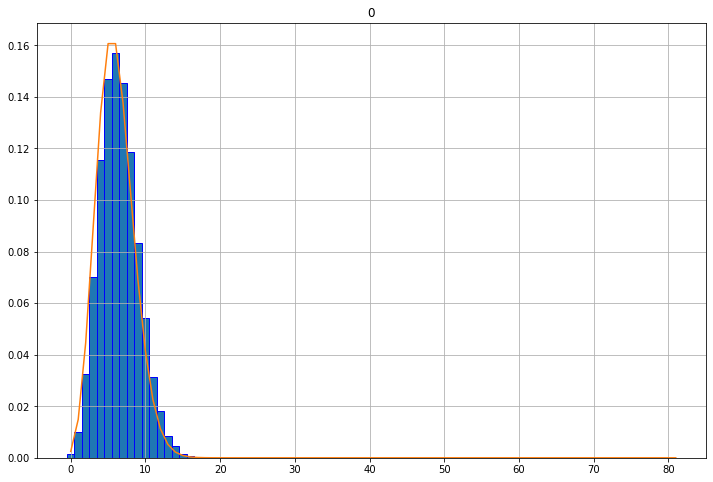

    values  mean  prob_mass_function
0      0.0   6.0        2.478752e-03
1      1.0   6.0        1.487251e-02
2      2.0   6.0        4.461754e-02
3      3.0   6.0        8.923508e-02
4      4.0   6.0        1.338526e-01
..     ...   ...                 ...
77    77.0   6.0        1.412418e-56
78    78.0   6.0        1.086476e-57
79    79.0   6.0        8.251714e-59
80    80.0   6.0        6.188785e-60
81    81.0   6.0        4.584285e-61

[82 rows x 3 columns]


In [56]:
plot_poisson(ca_death_df)

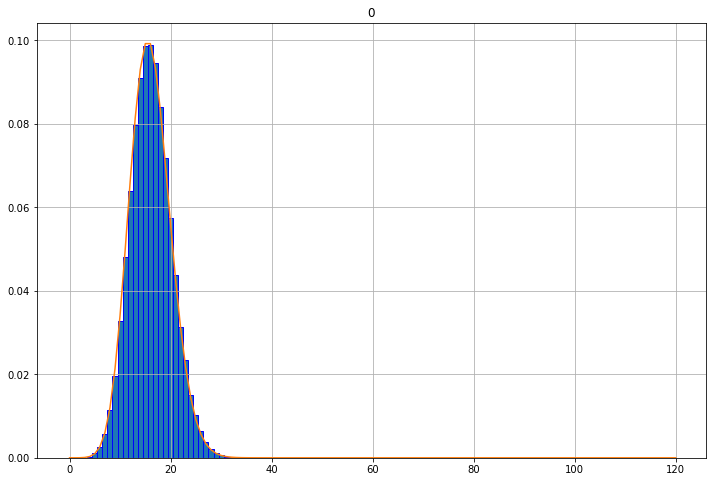

     values  mean  prob_mass_function
0       0.0  16.0        1.125352e-07
1       1.0  16.0        1.800563e-06
2       2.0  16.0        1.440450e-05
3       3.0  16.0        7.682401e-05
4       4.0  16.0        3.072961e-04
..      ...   ...                 ...
116   116.0  16.0        1.579823e-58
117   117.0  16.0        2.160442e-59
118   118.0  16.0        2.929413e-60
119   119.0  16.0        3.938707e-61
120   120.0  16.0        5.251609e-62

[121 rows x 3 columns]


In [57]:
plot_poisson(fl_death_df)

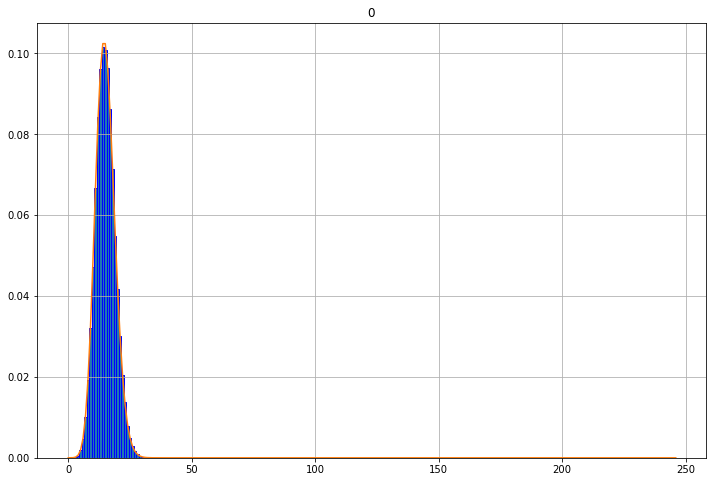

     values  mean  prob_mass_function
0       0.0  15.0        3.059023e-07
1       1.0  15.0        4.588535e-06
2       2.0  15.0        3.441401e-05
3       3.0  15.0        1.720701e-04
4       4.0  15.0        6.452627e-04
..      ...   ...                 ...
242   242.0  15.0       5.302325e-196
243   243.0  15.0       3.273040e-197
244   244.0  15.0       2.012115e-198
245   245.0  15.0       1.231907e-199
246   246.0  15.0       7.511628e-201

[247 rows x 3 columns]


In [58]:
plot_poisson(sc_death_df)

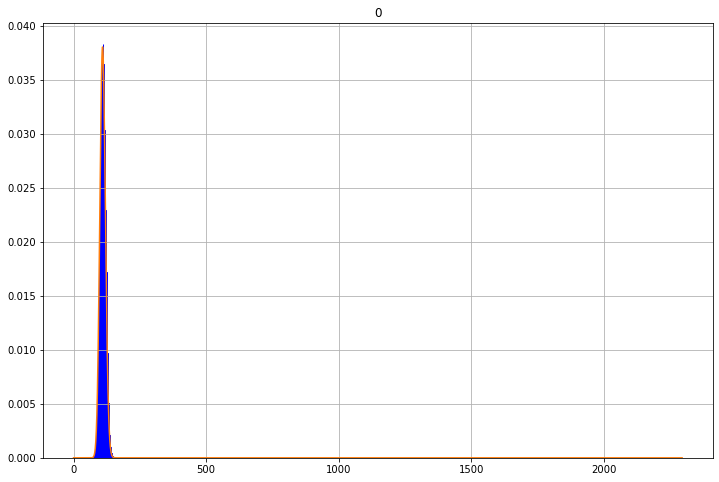

      values   mean  prob_mass_function
0        0.0  110.0        1.688912e-48
1        1.0  110.0        1.857803e-46
2        2.0  110.0        1.021792e-44
3        3.0  110.0        3.746570e-43
4        4.0  110.0        1.030307e-41
...      ...    ...                 ...
2291  2291.0  110.0        0.000000e+00
2292  2292.0  110.0        0.000000e+00
2293  2293.0  110.0        0.000000e+00
2294  2294.0  110.0        0.000000e+00
2295  2295.0  110.0        0.000000e+00

[2296 rows x 3 columns]


In [59]:
plot_poisson(tx_death_df)

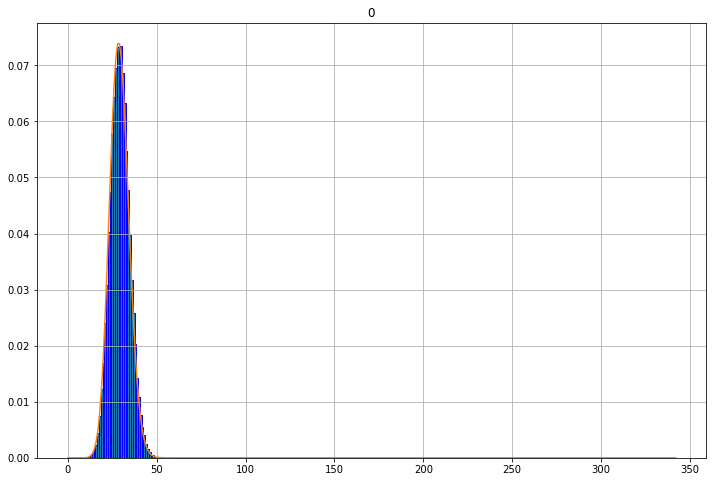

     values  mean  prob_mass_function
0       0.0  29.0        2.543666e-13
1       1.0  29.0        7.376630e-12
2       2.0  29.0        1.069611e-10
3       3.0  29.0        1.033958e-09
4       4.0  29.0        7.496193e-09
..      ...   ...                 ...
338   338.0  29.0       1.122065e-228
339   339.0  29.0       9.598789e-230
340   340.0  29.0       8.187202e-231
341   341.0  29.0       6.962723e-232
342   342.0  29.0       5.904064e-233

[343 rows x 3 columns]


In [60]:
plot_poisson(ar_death_df)

## Model poission distributions for North Carolina counties COVID-19 in cases and deaths

## Poisson distribution for NC everyday new cases

In [61]:
nc_cases_df = get_state_data('NC','cases')
calculate_stats(nc_cases_df, 'North Carolina')

Statistics of North Carolina state is shown below
Minimum value ---  -6310.0
Maximum value ---  31513.0
Mean ---  1846.1031468531469
Mode ---  0
Variance ---  7589801.984088153
Kurtosis ---  35.93865862808579
Skewdness ---  4.435871168210637


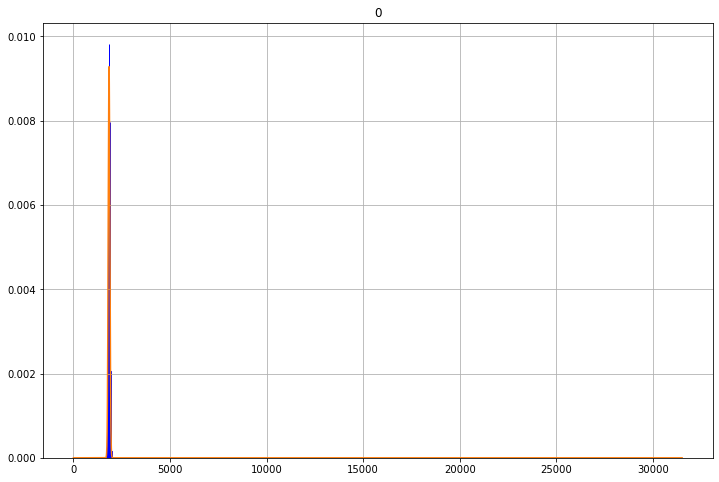

        values    mean  prob_mass_function
0          0.0  1846.0                 0.0
1          1.0  1846.0                 0.0
2          2.0  1846.0                 0.0
3          3.0  1846.0                 0.0
4          4.0  1846.0                 0.0
...        ...     ...                 ...
31508  31508.0  1846.0                 0.0
31509  31509.0  1846.0                 0.0
31510  31510.0  1846.0                 0.0
31511  31511.0  1846.0                 0.0
31512  31512.0  1846.0                 0.0

[31513 rows x 3 columns]


In [62]:
plot_poisson(nc_cases_df)

## Model poission distributions for North Carolina counties COVID-19 in cases and deaths.

## I am chosing Robeson,  Hyde, Sampson, Stanly and Columbus

In [65]:
def get_county_data(county,dataset_type):
    population_dataset = pd.read_csv('../../../../data/stage_2/covid_county_population_usafacts.csv')
    population_df = pd.DataFrame(population_dataset)
    if(dataset_type=='cases'):
        dataset = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
    elif(dataset_type=='deaths'):
        dataset = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
    county_wise_data = dataset[dataset['County Name'] != 'Statewide Unallocated']
    county_wise_data = county_wise_data.set_index(['countyFIPS','County Name','State','StateFIPS'])
    everyday_new_cases = county_wise_data.diff(axis=1)
    everyday_new_cases = everyday_new_cases.drop(columns = ['2020-01-22'])
    merged_cases_perday = pd.merge(everyday_new_cases, population_df, on='countyFIPS', how ='inner' )
    merged_cases_perday_state = merged_cases_perday[merged_cases_perday['State'] == 'NC']
    merged_cases_perday_state = merged_cases_perday[merged_cases_perday['County Name'] == county]
    merged_cases_perday_state = merged_cases_perday_state.set_index(['countyFIPS','State','County Name'])
    merged_cases_perday_state = round(((merged_cases_perday_state.div(merged_cases_perday_state['population'], axis=0))*100000).astype(int))
    merged_cases_perday_state = merged_cases_perday_state.drop(columns = ['population'])
    covid_cases_summed = merged_cases_perday_state.sum(axis = 0, skipna = True)
    df = pd.DataFrame(columns=everyday_new_cases.columns)
    df = df.append(covid_cases_summed, ignore_index=True)
    return df

## Robeson County everyday newcases

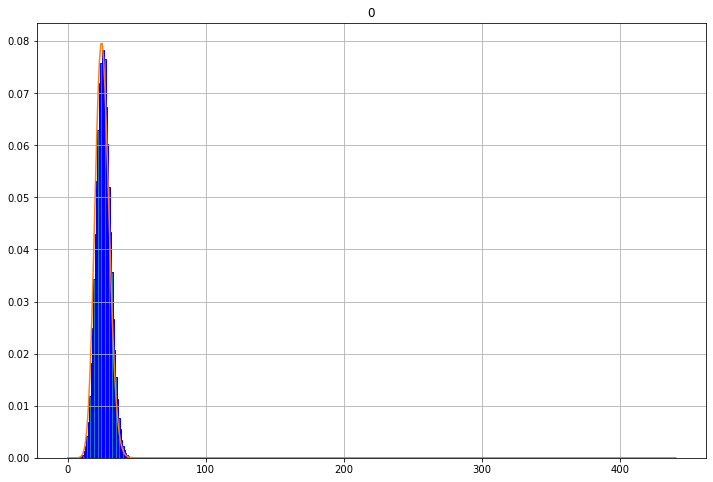

     values  mean  prob_mass_function
0       0.0  25.0        1.388794e-11
1       1.0  25.0        3.471986e-10
2       2.0  25.0        4.339982e-09
3       3.0  25.0        3.616652e-08
4       4.0  25.0        2.260408e-07
..      ...   ...                 ...
436   436.0  25.0        0.000000e+00
437   437.0  25.0        0.000000e+00
438   438.0  25.0        0.000000e+00
439   439.0  25.0        0.000000e+00
440   440.0  25.0        0.000000e+00

[441 rows x 3 columns]


In [66]:
rob_county = get_county_data('Robeson County','cases')
plot_poisson(rob_county)

## Robeson County Death Analysis

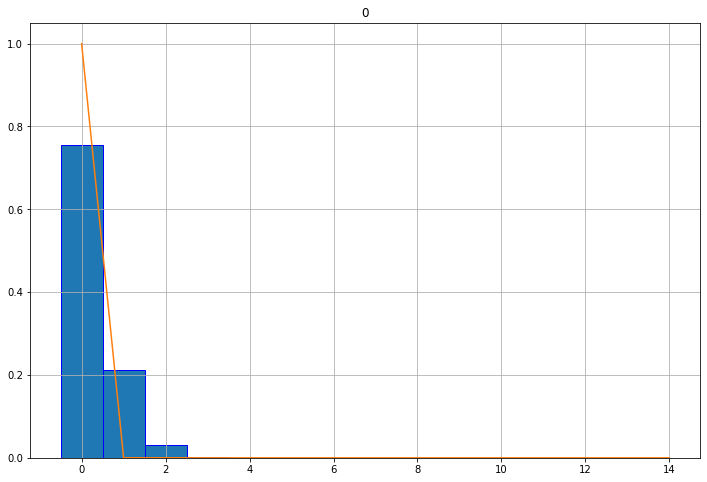

    values  mean  prob_mass_function
0      0.0   0.0                 1.0
1      1.0   0.0                 0.0
2      2.0   0.0                 0.0
3      3.0   0.0                 0.0
4      4.0   0.0                 0.0
5      5.0   0.0                 0.0
6      6.0   0.0                 0.0
7      7.0   0.0                 0.0
8      8.0   0.0                 0.0
9      9.0   0.0                 0.0
10    10.0   0.0                 0.0
11    11.0   0.0                 0.0
12    12.0   0.0                 0.0
13    13.0   0.0                 0.0
14    14.0   0.0                 0.0


In [67]:
rob_county_deaths=get_county_data('Robeson County','deaths')
plot_poisson(rob_county_deaths)

## Hyde County everyday cases

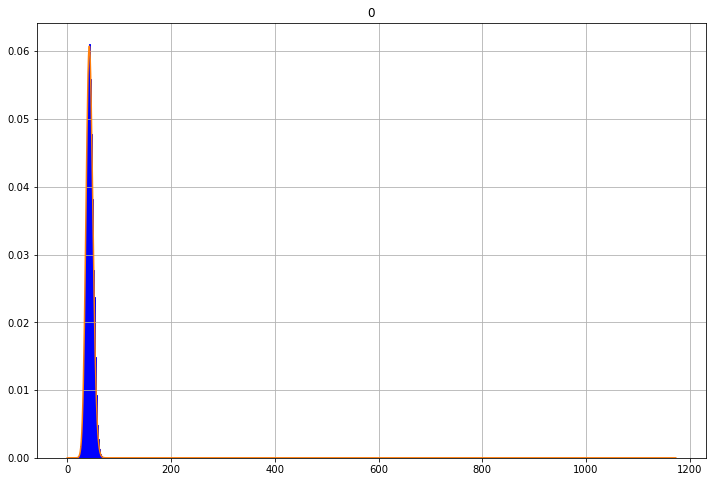

      values  mean  prob_mass_function
0        0.0  43.0        2.115131e-19
1        1.0  43.0        9.095063e-18
2        2.0  43.0        1.955439e-16
3        3.0  43.0        2.802795e-15
4        4.0  43.0        3.013005e-14
...      ...   ...                 ...
1169  1169.0  43.0        0.000000e+00
1170  1170.0  43.0        0.000000e+00
1171  1171.0  43.0        0.000000e+00
1172  1172.0  43.0        0.000000e+00
1173  1173.0  43.0        0.000000e+00

[1174 rows x 3 columns]


In [68]:
hyde_county = get_county_data('Hyde County','cases')
plot_poisson(hyde_county)

## Hyde County death cases

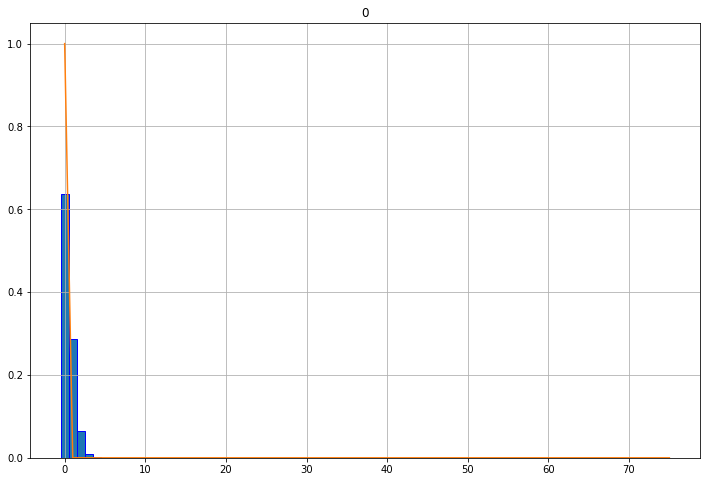

    values  mean  prob_mass_function
0      0.0   0.0                 1.0
1      1.0   0.0                 0.0
2      2.0   0.0                 0.0
3      3.0   0.0                 0.0
4      4.0   0.0                 0.0
..     ...   ...                 ...
71    71.0   0.0                 0.0
72    72.0   0.0                 0.0
73    73.0   0.0                 0.0
74    74.0   0.0                 0.0
75    75.0   0.0                 0.0

[76 rows x 3 columns]


In [69]:
hyde_county_deaths=get_county_data('Hyde County','deaths')
plot_poisson(hyde_county_deaths)

## Sampson County everyday case analysis

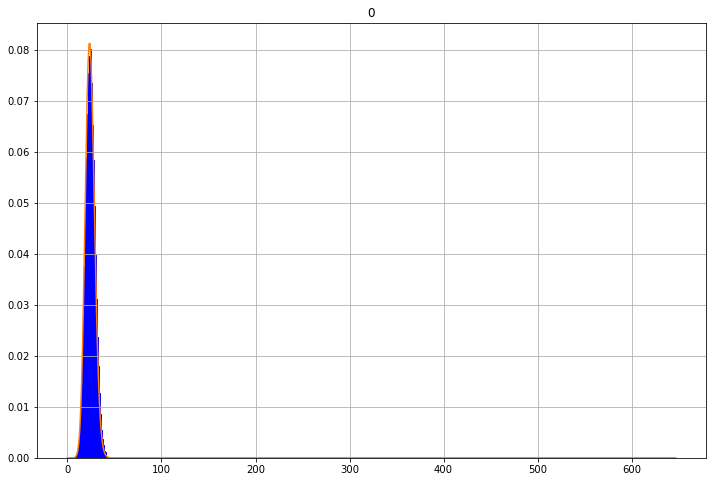

     values  mean  prob_mass_function
0       0.0  24.0        3.775135e-11
1       1.0  24.0        9.060323e-10
2       2.0  24.0        1.087239e-08
3       3.0  24.0        8.697910e-08
4       4.0  24.0        5.218746e-07
..      ...   ...                 ...
643   643.0  24.0        0.000000e+00
644   644.0  24.0        0.000000e+00
645   645.0  24.0        0.000000e+00
646   646.0  24.0        0.000000e+00
647   647.0  24.0        0.000000e+00

[648 rows x 3 columns]


In [70]:
sampson_county = get_county_data('Sampson County','cases')
plot_poisson(sampson_county)

## Sampson County death analysis

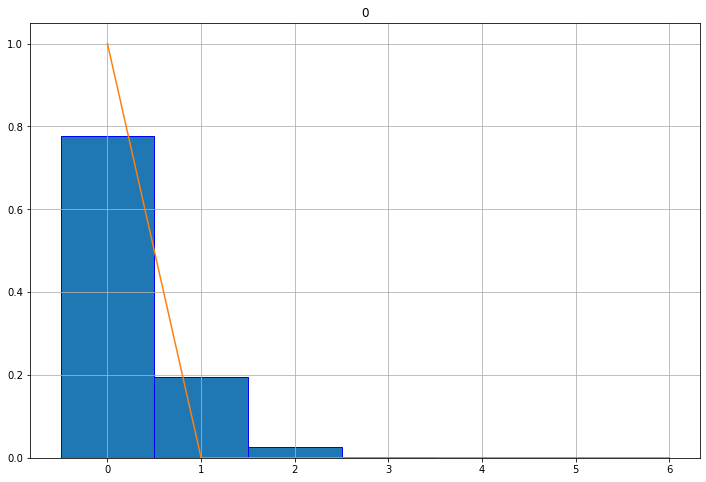

   values  mean  prob_mass_function
0     0.0   0.0                 1.0
1     1.0   0.0                 0.0
2     2.0   0.0                 0.0
3     3.0   0.0                 0.0
4     4.0   0.0                 0.0
5     5.0   0.0                 0.0
6     6.0   0.0                 0.0


In [71]:
samp_county_deaths=get_county_data('Sampson County','deaths')
plot_poisson(samp_county_deaths)

## Stanly County everyday case analysis

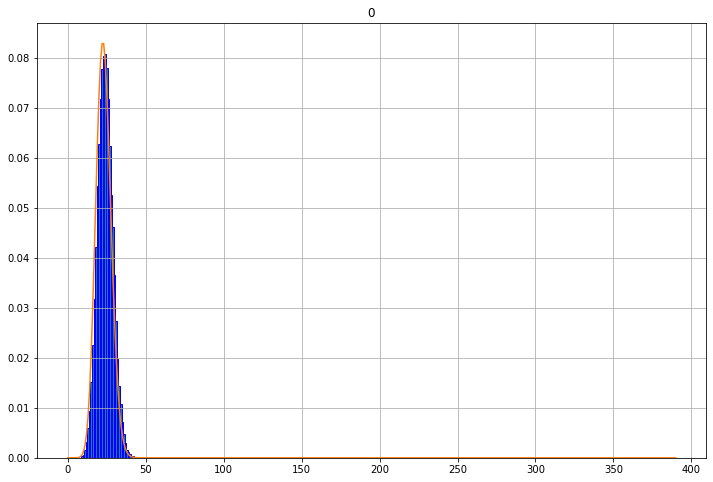

     values  mean  prob_mass_function
0       0.0  23.0        1.026188e-10
1       1.0  23.0        2.360232e-09
2       2.0  23.0        2.714267e-08
3       3.0  23.0        2.080938e-07
4       4.0  23.0        1.196539e-06
..      ...   ...                 ...
386   386.0  23.0       1.447654e-317
387   387.0  23.0       8.603610e-319
388   388.0  23.0       5.100240e-320
389   389.0  23.0       3.013800e-321
390   390.0  23.0       1.778636e-322

[391 rows x 3 columns]


In [72]:
stanly_county = get_county_data('Stanly County','cases')
plot_poisson(stanly_county)

## Stanly County death analysis

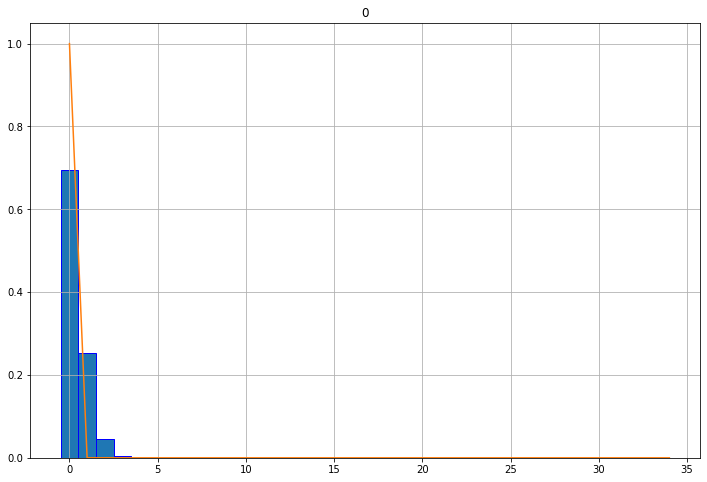

    values  mean  prob_mass_function
0      0.0   0.0                 1.0
1      1.0   0.0                 0.0
2      2.0   0.0                 0.0
3      3.0   0.0                 0.0
4      4.0   0.0                 0.0
5      5.0   0.0                 0.0
6      6.0   0.0                 0.0
7      7.0   0.0                 0.0
8      8.0   0.0                 0.0
9      9.0   0.0                 0.0
10    10.0   0.0                 0.0
11    11.0   0.0                 0.0
12    12.0   0.0                 0.0
13    13.0   0.0                 0.0
14    14.0   0.0                 0.0
15    15.0   0.0                 0.0
16    16.0   0.0                 0.0
17    17.0   0.0                 0.0
18    18.0   0.0                 0.0
19    19.0   0.0                 0.0
20    20.0   0.0                 0.0
21    21.0   0.0                 0.0
22    22.0   0.0                 0.0
23    23.0   0.0                 0.0
24    24.0   0.0                 0.0
25    25.0   0.0                 0.0
2

In [73]:
stanly_county_deaths = get_county_data('Stanly County','deaths')
plot_poisson(stanly_county_deaths)

## Columbus county everyday case analysis

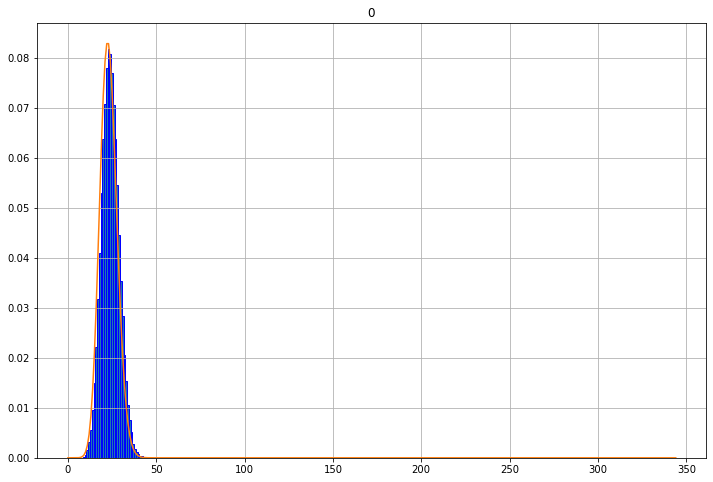

     values  mean  prob_mass_function
0       0.0  23.0        1.026188e-10
1       1.0  23.0        2.360232e-09
2       2.0  23.0        2.714267e-08
3       3.0  23.0        2.080938e-07
4       4.0  23.0        1.196539e-06
..      ...   ...                 ...
340   340.0  23.0       1.954553e-262
341   341.0  23.0       1.318320e-263
342   342.0  23.0       8.865895e-265
343   343.0  23.0       5.945061e-266
344   344.0  23.0       3.974895e-267

[345 rows x 3 columns]


In [74]:
columbus_county = get_county_data('Columbus County','cases')
plot_poisson(columbus_county)

## Columbus county death case analysis

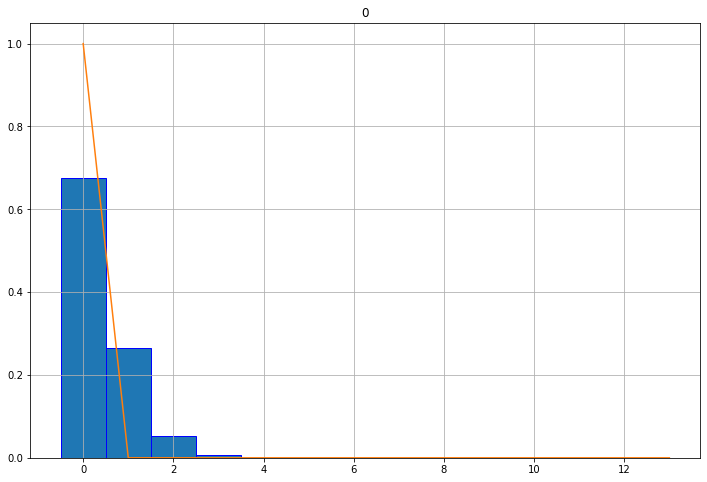

    values  mean  prob_mass_function
0      0.0   0.0                 1.0
1      1.0   0.0                 0.0
2      2.0   0.0                 0.0
3      3.0   0.0                 0.0
4      4.0   0.0                 0.0
5      5.0   0.0                 0.0
6      6.0   0.0                 0.0
7      7.0   0.0                 0.0
8      8.0   0.0                 0.0
9      9.0   0.0                 0.0
10    10.0   0.0                 0.0
11    11.0   0.0                 0.0
12    12.0   0.0                 0.0
13    13.0   0.0                 0.0


In [75]:
columbus_county_deaths = get_county_data('Columbus County','deaths')
plot_poisson(columbus_county_deaths)

## Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns

#### I am chosing ACS Demographic dataset since I worked on this in task1. The dataset mainly describes the demographic distribution of different categories of people over different counties of specific state across United States. Along with population, the households occupied by the population is also mentioned.

In [76]:
# Read the enrichment dataset
acs_data = pd.read_csv('../../../../data/stage_2/ACSDP1Y2019.DP05_data_with_overlays_2021-09-21T071853.csv')
acs_data_refined = acs_data.rename(columns=acs_data.iloc[0])
acs_data_refined=acs_data_refined.drop([0])
acs_data_refined['id'] = acs_data_refined['id'].str.slice(start=9)
acs_data_refined = acs_data_refined.rename(columns={"id":"countyFIPS"})
acs_data_refined = acs_data_refined.astype({'countyFIPS': 'int64'})
split_county = acs_data_refined["Geographic Area Name"].str.split(",")
county = split_county.to_list()
column_names = ["County name", "State"]
latest_df = pd.DataFrame(county,columns=column_names)
no_geo = acs_data_refined.drop(columns=['Geographic Area Name'])
add_county_state = pd.concat([no_geo,latest_df],axis=1)
add_county_state=add_county_state.drop([0])
add_county_state

,countyFIPS,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,...,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",County name,State
1,1003.0,223234,*****,223234,(X),109192,1466,48.9,0.7,114042,...,80874,1076,47.2,0.6,90470,1507,52.8,0.6,Calhoun County,Alabama
2,1015.0,113605,*****,113605,(X),54285,701,47.8,0.6,59320,...,41162,477,46.8,0.4,46710,739,53.2,0.4,Cullman County,Alabama
3,1043.0,83768,*****,83768,(X),40579,905,48.4,1.1,43189,...,30623,245,48.0,0.6,33195,683,52.0,0.6,DeKalb County,Alabama
4,1049.0,71513,*****,71513,(X),35688,884,49.9,1.2,35825,...,24299,850,49.3,1.4,24996,808,50.7,1.4,Elmore County,Alabama
5,1051.0,81209,*****,81209,(X),40060,882,49.3,1.1,41149,...,29171,741,47.5,0.6,32223,418,52.5,0.6,Etowah County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,72113.0,131881,*****,131881,(X),63269,*****,48.0,*****,68612,...,50442,255,47.5,0.3,55731,560,52.5,0.3,San Juan Municipio,Puerto Rico
837,72127.0,318441,*****,318441,(X),145575,*****,45.7,*****,172866,...,110694,1561,44.9,0.4,136074,1985,55.1,0.4,Toa Alta Municipio,Puerto Rico
838,72135.0,72025,*****,72025,(X),34516,776,47.9,1.1,37509,...,27592,2,47.2,0.1,30804,2,52.8,0.1,Toa Baja Municipio,Puerto Rico
839,72137.0,74271,*****,74271,(X),34594,*****,46.6,*****,39677,...,27177,455,45.5,0.4,32541,422,54.5,0.4,Trujillo Alto Municipio,Puerto Rico


#### calculate the total cases per day, deaths per day and merge with population

In [77]:
task2_pop = pd.read_csv('../../../../data/stage_2/covid_county_population_usafacts.csv')
task2_confirmedcases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
casestask2_deathcases = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')

In [78]:
task2_confirmedcases = task2_confirmedcases[task2_confirmedcases['County Name'] != 'Statewide Unallocated']
task2_confirmedcases = task2_confirmedcases.set_index(['countyFIPS','County Name','State','StateFIPS'])
task2_confirmedcases = task2_confirmedcases.diff(axis=1)
task2_confirmedcases = task2_confirmedcases.drop(columns = ['2020-01-22'])
task2_confirmedcases['newcases'] = task2_confirmedcases.sum(axis=1)

In [79]:
casestask2_deathcases = casestask2_deathcases[casestask2_deathcases['County Name'] != 'Statewide Unallocated']
casestask2_deathcases = casestask2_deathcases.set_index(['countyFIPS','County Name','State','StateFIPS'])
casestask2_deathcases = casestask2_deathcases.diff(axis=1)
casestask2_deathcases = casestask2_deathcases.drop(columns = ['2020-01-22'])
casestask2_deathcases['death_cases'] = casestask2_deathcases.sum(axis=1)

In [80]:
task2_confirmedcases = task2_confirmedcases.reset_index()
casestask2_deathcases = casestask2_deathcases.reset_index()
cases = task2_confirmedcases[['countyFIPS','County Name','State','newcases']]
deaths = casestask2_deathcases[['countyFIPS','County Name','State','death_cases']]

In [81]:
task2_pop = task2_pop[task2_pop['County Name'] != 'Statewide Unallocated']
task2_pop

,countyFIPS,County Name,State,population
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
5,1009,Blount County,AL,57826
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [82]:
merge1 = pd.merge(cases,task2_pop, on ="countyFIPS")
merge2 = pd.merge(deaths,merge1,on ="countyFIPS")
merge2 = merge2.drop(columns=['County Name_x','State_x','County Name_y','State_y'])

In [83]:
census_merge = pd.merge(add_county_state,merge2,on="countyFIPS")
census_merge

,countyFIPS,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,...,"Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",County name,State_x,County Name,State_y,death_cases,newcases,population
0,1003.0,223234,*****,223234,(X),109192,1466,48.9,0.7,114042,...,1507,52.8,0.6,Calhoun County,Alabama,Baldwin County,AL,347.0,29234.0,223234
1,1015.0,113605,*****,113605,(X),54285,701,47.8,0.6,59320,...,739,53.2,0.4,Cullman County,Alabama,Calhoun County,AL,340.0,16340.0,113605
2,1043.0,83768,*****,83768,(X),40579,905,48.4,1.1,43189,...,683,52.0,0.6,DeKalb County,Alabama,Cullman County,AL,212.0,11279.0,83768
3,1049.0,71513,*****,71513,(X),35688,884,49.9,1.2,35825,...,808,50.7,1.4,Elmore County,Alabama,DeKalb County,AL,197.0,10074.0,71513
4,1051.0,81209,*****,81209,(X),40060,882,49.3,1.1,41149,...,418,52.5,0.6,Etowah County,Alabama,Elmore County,AL,226.0,11711.0,81209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,55133.0,404198,*****,404198,(X),199198,745,49.3,0.2,205000,...,1260,51.3,0.2,Winnebago County,Wisconsin,Waukesha County,WI,593.0,51878.0,404198
825,55139.0,171907,*****,171907,(X),86978,630,50.6,0.4,84929,...,1072,49.8,0.4,Wood County,Wisconsin,Winnebago County,WI,204.0,22202.0,171907
826,55141.0,72999,*****,72999,(X),35862,283,49.1,0.4,37137,...,290,51.3,0.5,Laramie County,Wyoming,Wood County,WI,94.0,7995.0,72999
827,56021.0,99500,*****,99500,(X),50766,1034,51.0,1.0,48734,...,808,49.9,1.0,Natrona County,Wyoming,Laramie County,WY,137.0,12215.0,99500


## Perform correlation between states

#### selecting three variables Estimate!!SEX AND AGE!!Total population!!Male , Estimate!!SEX AND AGE!!Total population!!Female, Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female

## California State

In [84]:
def calculate_corr(state, types):
    if(types == 'cases'):
        selected_frame = census_merge[['State_y','Estimate!!SEX AND AGE!!Total population!!Male','Estimate!!SEX AND AGE!!Total population!!Female','Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female','population','newcases']]
    else:
        selected_frame = census_merge[['State_y','Estimate!!SEX AND AGE!!Total population!!Male','Estimate!!SEX AND AGE!!Total population!!Female','Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female','population','death_cases']]
    selected_frame = selected_frame[selected_frame['State_y']==state]
    selected_frame = selected_frame.set_index(['State_y'])
    selected_frame = selected_frame.astype('int32')
    return selected_frame.corr()

In [85]:
ca_corr = calculate_corr('CA','cases')
ca_corr

,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",population,newcases
Estimate!!SEX AND AGE!!Total population!!Male,1.000000,0.999837,0.999279,0.999958,0.984117
Estimate!!SEX AND AGE!!Total population!!Female,0.999837,1.000000,0.999399,0.999960,0.985066
"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",0.999279,0.999399,1.000000,0.999381,0.981312
population,0.999958,0.999960,0.999381,1.000000,0.984637
newcases,0.984117,0.985066,0.981312,0.984637,1.000000


We can oobserve that there is a positive values for non- normalized data, meaning there is dependency of one value of other. If variable raises, other variable also raises. I believe with the increase in new cases and death cases the relation between all age category will increase.

In [86]:
nc_corr = calculate_corr('NC', 'cases')
nc_corr

,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",population,newcases
Estimate!!SEX AND AGE!!Total population!!Male,1.000000,0.998635,0.997211,0.999634,0.982634
Estimate!!SEX AND AGE!!Total population!!Female,0.998635,1.000000,0.999253,0.999683,0.983503
"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",0.997211,0.999253,1.000000,0.998609,0.979866
population,0.999634,0.999683,0.998609,1.000000,0.983420
newcases,0.982634,0.983503,0.979866,0.983420,1.000000


#### Normalize the data

In [87]:
def calculate_corr_norm(state,types):
    if(types == 'cases'):
        selected_frame_norm = census_merge[['State_y','Estimate!!SEX AND AGE!!Total population!!Male','Estimate!!SEX AND AGE!!Total population!!Female','Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female','population','newcases']]
    else:
        selected_frame_norm = census_merge[['State_y','Estimate!!SEX AND AGE!!Total population!!Male','Estimate!!SEX AND AGE!!Total population!!Female','Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female','population','death_cases']]
    selected_frame_norm = selected_frame_norm[selected_frame_norm['State_y']==state]
    selected_frame_norm = selected_frame_norm.set_index(['State_y'])
    selected_frame_norm = selected_frame_norm.astype('int32')
    selected_frame_norm = round(((selected_frame_norm.div(selected_frame_norm['population'], axis=0))*100000).astype(int))
    selected_frame_norm = selected_frame_norm.drop(columns=['population'])   
    return selected_frame_norm.corr()

In [88]:
ny_corr_norm = calculate_corr_norm('NY','cases')
ny_corr_norm

,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",newcases
Estimate!!SEX AND AGE!!Total population!!Male,1.000000,-1.000000,0.042585,-0.434392
Estimate!!SEX AND AGE!!Total population!!Female,-1.000000,1.000000,-0.042585,0.434392
"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",0.042585,-0.042585,1.000000,-0.603842
newcases,-0.434392,0.434392,-0.603842,1.000000


In [89]:
ca_corr_norm = calculate_corr_norm('CA','cases')
ca_corr_norm

,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",newcases
Estimate!!SEX AND AGE!!Total population!!Male,1.000000,-1.000000,-0.655974,0.577321
Estimate!!SEX AND AGE!!Total population!!Female,-1.000000,1.000000,0.655974,-0.577321
"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",-0.655974,0.655974,1.000000,-0.760211
newcases,0.577321,-0.577321,-0.760211,1.000000


When the data is normalized for 100000 population , I obsereved negative correlation between some values. A negative correlation means when one variable increases other variable decreases. If we consider the total cases, with it's increase, there is a reduction in female 18 over population, meaning there are very less people in that age category infected as the cases number increased.

In [90]:
ca_corr_death = calculate_corr('CA','death')
ca_corr_death

,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",population,death_cases
Estimate!!SEX AND AGE!!Total population!!Male,1.000000,0.999837,0.999279,0.999958,0.969729
Estimate!!SEX AND AGE!!Total population!!Female,0.999837,1.000000,0.999399,0.999960,0.971916
"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",0.999279,0.999399,1.000000,0.999381,0.966431
population,0.999958,0.999960,0.999381,1.000000,0.970875
death_cases,0.969729,0.971916,0.966431,0.970875,1.000000


In [91]:
ny_corr_norm = calculate_corr_norm('NY','death')
ny_corr_norm

,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",death_cases
Estimate!!SEX AND AGE!!Total population!!Male,1.000000,-1.000000,0.042585,-0.646295
Estimate!!SEX AND AGE!!Total population!!Female,-1.000000,1.000000,-0.042585,0.646295
"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",0.042585,-0.042585,1.000000,-0.653955
death_cases,-0.646295,0.646295,-0.653955,1.000000
